In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading and Understanding the data

In [2]:
bike = pd.read_csv("C:/Users/ACER/Downloads/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

All categorical variables are in integer format. so, will change in categorical values

In [7]:
def assign_season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

bike["season"] = bike["season"].apply(assign_season)
# Seasons are assigned

In [8]:
def assign_mnth(x):
    return x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

bike["mnth"] = bike[["mnth"]].apply(assign_mnth)
# Months are assigned

In [9]:
#same coding should be done to 
#weekday
#year
#holiday
#season
#month
#wether
#holiday

In [10]:
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [11]:
def ass_weekday(x):
    return x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

bike["weekday"] = bike[["weekday"]].apply(ass_weekday)
#weekdays are assigned

In [12]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
def ass_weathersit(x):
    return x.map({1:"Clear",2:"Few Clouds",3:"Partly cloudy"})

bike["weathersit"] = bike[["weathersit"]].apply(ass_weathersit)
#weathers are assigned

In [14]:
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

The year,holiday and workingday are converted to object variable

In [15]:
bike["yr"] = bike["yr"].astype("object")
bike["holiday"] = bike["holiday"].astype("object")
bike["workingday"] = bike["workingday"].astype("object")

In [16]:
bike['dteday'] = bike['dteday'].astype('datetime64')

In [17]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

let's select all variables expect integers,float and datetime

In [18]:
cols_num = bike.select_dtypes(exclude=["object"])
cols_num

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [19]:
x = cols_num.columns
x

Index(['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [20]:
x=x[1:]
x

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

### Visualisation of the data

distribution plot of all integer variables

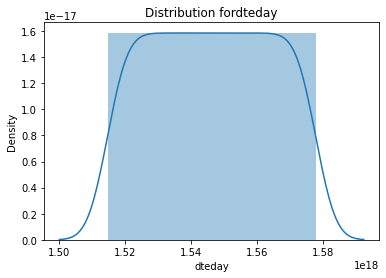

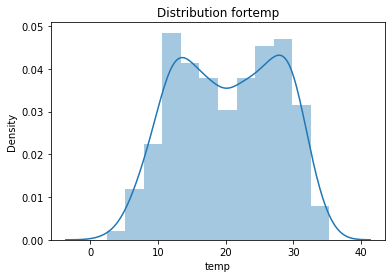

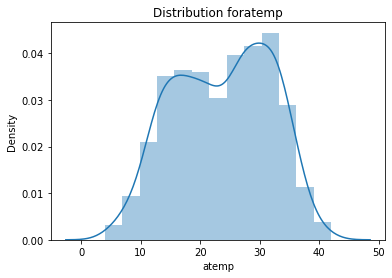

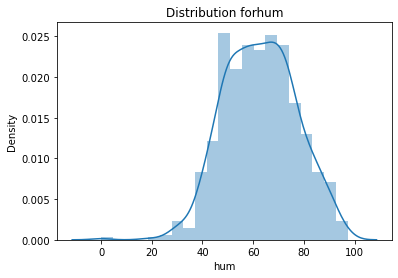

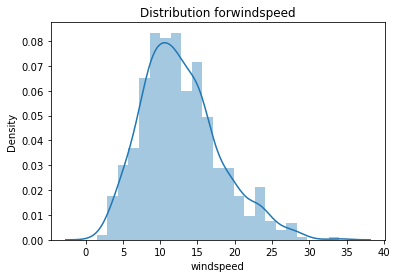

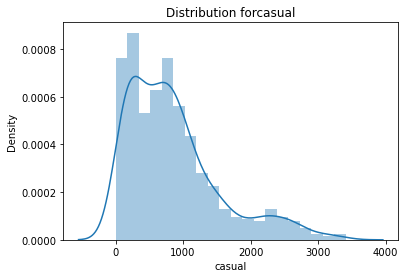

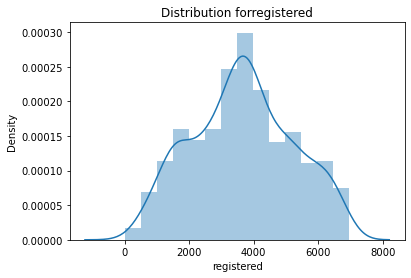

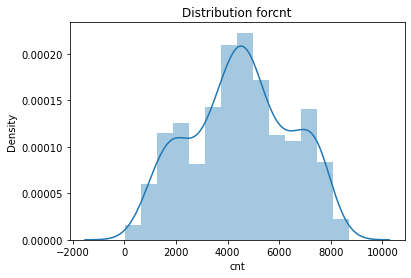

In [21]:
for col in x:
    sns.distplot(bike[col])
    plt.title("Distribution for"+col)
    plt.show()

Selecting all categorical variables

In [23]:
cat_cols = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
cat_cols

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Few Clouds
1,spring,0,Jan,0,Tue,1,Few Clouds
2,spring,0,Jan,0,Wed,1,Clear
3,spring,0,Jan,0,Thu,1,Clear
4,spring,0,Jan,0,Fri,1,Clear
...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Fri,1,Few Clouds
726,spring,1,Dec,0,Sat,0,Few Clouds
727,spring,1,Dec,0,Sun,0,Few Clouds
728,spring,1,Dec,0,Mon,1,Clear


In [24]:
#checking and extracting categorical columns
cols_catg = bike.select_dtypes(exclude=["float64","int64","datetime64"])
cols_catg

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Few Clouds
1,spring,0,Jan,0,Tue,1,Few Clouds
2,spring,0,Jan,0,Wed,1,Clear
3,spring,0,Jan,0,Thu,1,Clear
4,spring,0,Jan,0,Fri,1,Clear
...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Fri,1,Few Clouds
726,spring,1,Dec,0,Sat,0,Few Clouds
727,spring,1,Dec,0,Sun,0,Few Clouds
728,spring,1,Dec,0,Mon,1,Clear


In [25]:
cols_catg.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

Plotting plots for all categorical variables

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

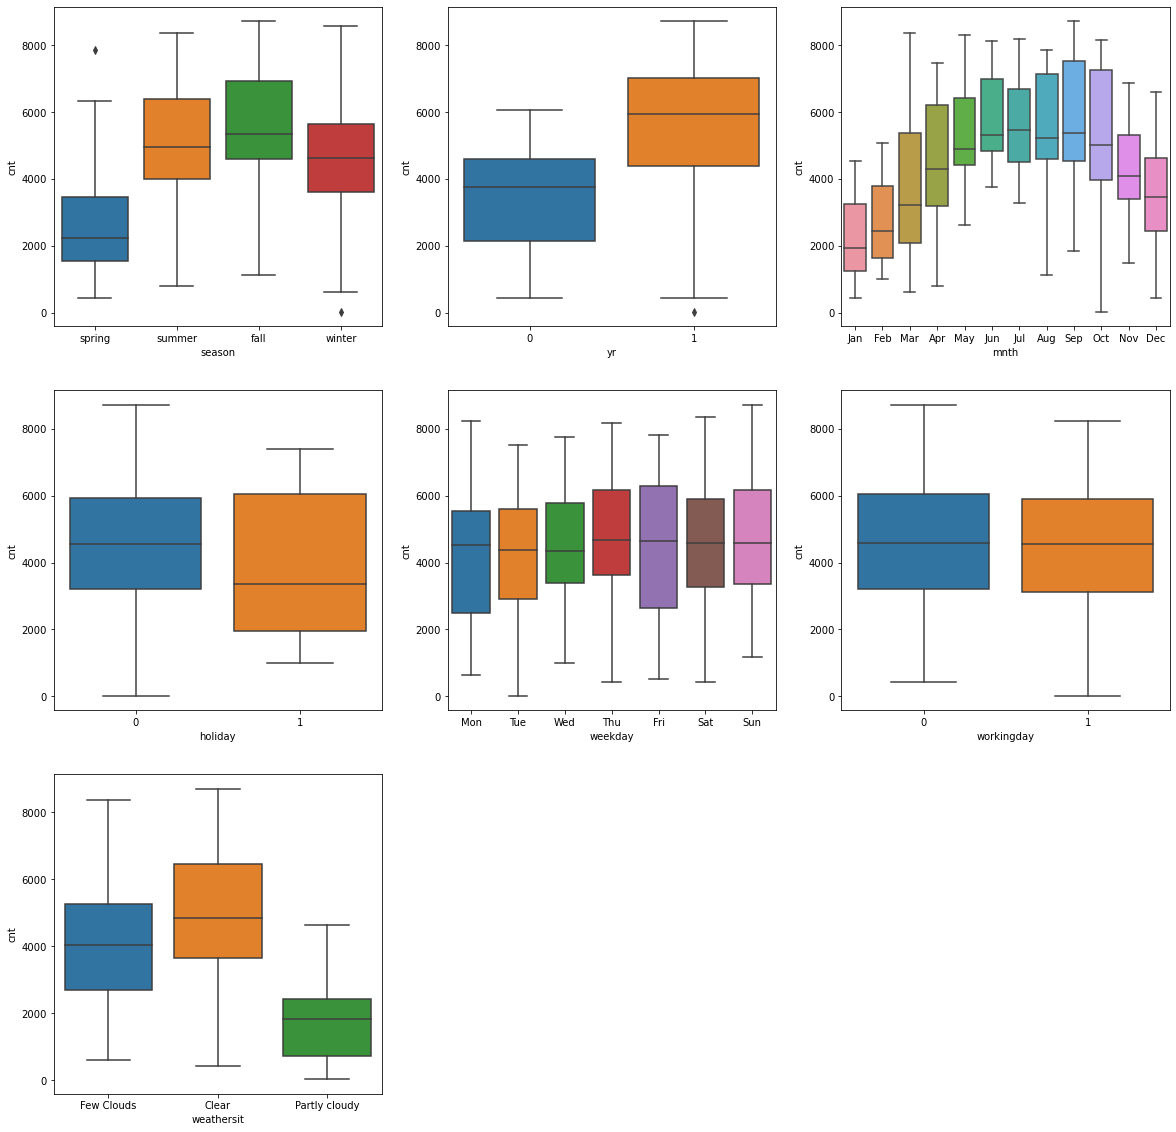

In [26]:
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=bike)
plt.subplot(3,3,2)
sns.boxplot(data=bike,x="yr",y="cnt")
plt.subplot(3,3,3)
sns.boxplot(data=bike,x="mnth",y="cnt")
plt.subplot(3,3,4)
sns.boxplot(data=bike,x="holiday",y="cnt")
plt.subplot(3,3,5)
sns.boxplot(data=bike,x="weekday",y="cnt")
plt.subplot(3,3,6)
sns.boxplot(data=bike, x="workingday",y="cnt")
plt.subplot(3,3,7)
sns.boxplot(data=bike,x="weathersit",y="cnt")

In [27]:
bike[x].head()

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Plotting pairplot to understand the variables behaviour to check the significance

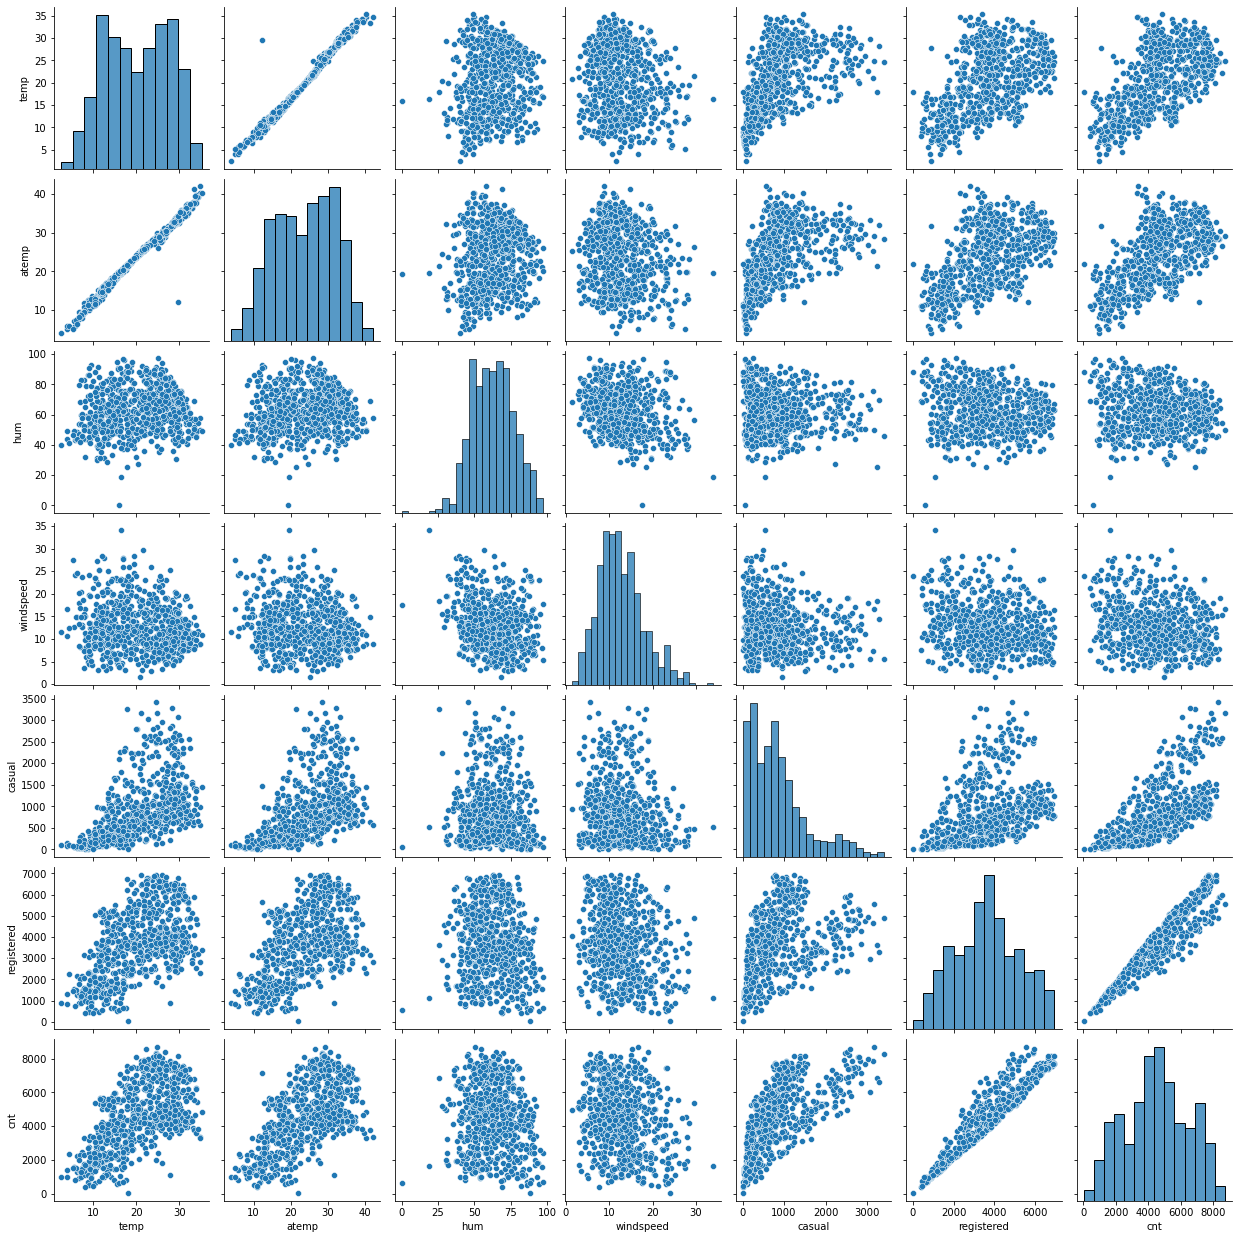

In [28]:
sns.pairplot(bike[x])

Correlation of the variables in the dataset and plotting heatmap

In [29]:
cor_num = bike[x].corr()
cor_num

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


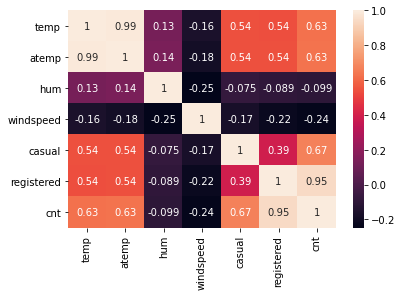

In [30]:
sns.heatmap(cor_num,annot=True)
plt.show()

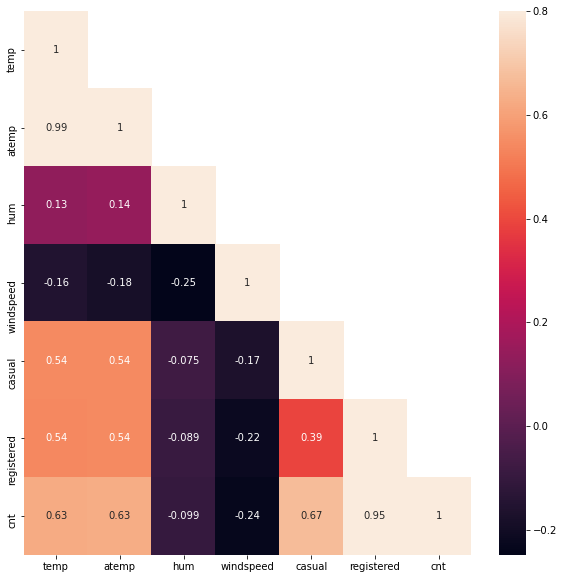

In [31]:
mask = np.array(cor_num)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor_num,mask=mask,vmax=0.8,annot=True)
plt.show()

As instant variable is of no use so dropping it

### Data preparation

In [32]:
bike.drop("instant",axis=1,inplace=True)

In [33]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Mon,1,Few Clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,0,Tue,1,Few Clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


lets create dummy variables

In [34]:
dummies = pd.get_dummies(cols_catg,drop_first=True)
dummies.columns

Index(['season_spring', 'season_summer', 'season_winter', 'yr_1', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_1', 'weathersit_Few Clouds',
       'weathersit_Partly cloudy'],
      dtype='object')

In [35]:
list(cols_catg.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [36]:
bike = bike.drop(list(cols_catg.columns),axis=1)
bike.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

Now concat the dummy variables dataset and bike dataset

In [37]:
bike = pd.concat([bike,dummies],axis=1)
bike.head()

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Few Clouds,weathersit_Partly cloudy
0,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,...,0,1,0,0,0,0,0,1,1,0
1,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,...,0,0,0,0,0,1,0,1,1,0
2,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


Dropping the casual and registered columns as their sum is "cnt" and they are not useful to analyse

In [38]:
bike.drop(["casual","registered"],axis=1,inplace=True)
bike.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_1', 'weathersit_Few Clouds',
       'weathersit_Partly cloudy'],
      dtype='object')

Dropping the data column as it is also not considered for further analysis

In [39]:
bike.drop(["dteday"],axis=1,inplace=True)
bike.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'workingday_1', 'weathersit_Few Clouds',
       'weathersit_Partly cloudy'],
      dtype='object')

### Scaling 

The Scaling is done in MinMaxScaler method

    - importing the scaler from the library and use scaler to fit and transform the model for numerical columns

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
num_vars  = ["temp","atemp","hum","windspeed","cnt"]
bike[num_vars] = scaler.fit_transform(bike[num_vars])
bike.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_1,mnth_Aug,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Few Clouds,weathersit_Partly cloudy
0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

In [42]:
X = bike.drop("cnt",axis=1)
y= bike["cnt"]

In [43]:
X.shape

(730, 29)

In [44]:
y.shape

(730,)

Importing the *train_test_split* and splitting the model into train and test

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [46]:
X_train.shape

(511, 29)

In [47]:
X_test.shape

(219, 29)

In [48]:
y_train.shape

(511,)

In [49]:
y_test.shape

(219,)

Importing the required libraries from skikit learn(sklearn)

In [50]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [52]:
reg.coef_

array([ 0.38592795,  0.05576457, -0.15929804, -0.18796655, -0.04092946,
        0.045884  ,  0.11192624,  0.23165329,  0.02927101, -0.04414481,
       -0.03721754, -0.06398828, -0.02710443,  0.00982631,  0.00114337,
        0.02573581, -0.03921142,  0.0087804 ,  0.09198682, -0.13445896,
       -0.02487107, -0.05458894, -0.04878464,  0.00399736, -0.02630557,
       -0.00878039, -0.05924257, -0.05807821, -0.25001761])

In [53]:
bike_coef = pd.DataFrame(reg.coef_,X.columns,columns=["Coefficient"])
bike_coef

,Coefficient
temp,0.385928
atemp,0.055765
hum,-0.159298
windspeed,-0.187967
season_spring,-0.040929
season_summer,0.045884
season_winter,0.111926
yr_1,0.231653
mnth_Aug,0.029271
mnth_Dec,-0.044145


In [54]:
print(reg.intercept_)

0.3985256627107029


In [55]:
y_pred = reg.predict(X_test)

In [56]:
compare = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare

,Actual,Predicted
184,0.692706,0.406643
535,0.712034,0.893078
299,0.303382,0.430699
221,0.547400,0.614747
152,0.569029,0.601848
...,...,...
400,0.336516,0.349176
702,0.757478,0.679881
127,0.495973,0.518713
640,0.868615,0.816249


#### Let's find out Absolute Error,Sqaured Error and Root Mean Squared Error

In [57]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.0667488824206831
Mean Squared Error: 0.008118964768391614
Root Mean Squared Error: 0.09010529822597345


### RFE

In [58]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

RFE for random 50 values

In [59]:
rfe = RFE(reg,50)
rfe = rfe.fit(X_train,y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', True, 1),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Few Clouds', True, 1),
 ('weathersit_Partly cloudy', True, 1)]

the cols columns which are rfe.support

In [61]:
cols = X_train.columns[rfe.support_]
cols

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'holiday_1', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_1',
       'weathersit_Few Clouds', 'weathersit_Partly cloudy'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [63]:
X_train_rfe = X_train[cols]

In [64]:
X_train_rfe

,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,...,holiday_1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_1,weathersit_Few Clouds,weathersit_Partly cloudy
653,0.509887,0.501133,0.574121,0.329497,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
576,0.815169,0.766351,0.724079,0.294871,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
426,0.442393,0.438975,0.638817,0.285911,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,0.245101,0.200348,0.497001,0.676936,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
482,0.395666,0.391735,0.503427,0.221789,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.863973,0.824359,0.678234,0.220508,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
53,0.202618,0.218747,0.435006,0.147857,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0.248216,0.223544,0.576692,0.455140,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
79,0.462664,0.434043,0.758243,0.549180,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0


#### Building model using statsmodel, for the detailed statistics

In [65]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X


def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [66]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     94.33
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          3.45e-178
Time:                        21:15:17   Log-Likelihood:                 523.76
No. Observations:                 511   AIC:                            -987.5
Df Residuals:                     481   BIC:                            -860.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
checkVIF(X_train_new)

,Features,VIF
0,const,465.82
1,temp,66.83
27,workingday_1,66.37
2,atemp,55.81
23,weekday_Sun,38.79
22,weekday_Sat,36.99
5,season_spring,10.78
7,season_winter,9.52
6,season_summer,8.30
20,holiday_1,6.80


First let's drop *workingday_1* as it is highly insignificant and the VIF is high

In [68]:
X_train_new = X_train_rfe.drop("workingday_1",axis=1,inplace=True)

In [69]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     97.74
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.86e-179
Time:                        21:15:28   Log-Likelihood:                 523.39
No. Observations:                 511   AIC:                            -988.8
Df Residuals:                     482   BIC:                            -865.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
checkVIF(X_train_new)

,Features,VIF
0,const,130.99
1,temp,66.78
2,atemp,55.80
5,season_spring,10.78
7,season_winter,9.51
6,season_summer,8.30
17,mnth_Nov,6.78
18,mnth_Oct,6.58
9,mnth_Aug,6.48
12,mnth_Jan,5.91


Now Let's Drop *atemp*

In [71]:
X_train_new = X_train_rfe.drop("atemp",axis=1,inplace=True)

In [72]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.14e-180
Time:                        21:15:37   Log-Likelihood:                 523.31
No. Observations:                 511   AIC:                            -990.6
Df Residuals:                     483   BIC:                            -872.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
checkVIF(X_train_new)

,Features,VIF
0,const,130.97
4,season_spring,10.76
6,season_winter,9.49
5,season_summer,8.27
1,temp,7.11
16,mnth_Nov,6.78
17,mnth_Oct,6.58
8,mnth_Aug,6.37
11,mnth_Jan,5.90
9,mnth_Dec,5.67


now i would like to drop *mnth_mar* variable, since it is insignificant

In [74]:
X_train_new = X_train_rfe.drop(["mnth_Mar"],axis=1,inplace=True)

In [75]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.95e-181
Time:                        21:15:48   Log-Likelihood:                 523.31
No. Observations:                 511   AIC:                            -992.6
Df Residuals:                     484   BIC:                            -878.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [76]:
checkVIF(X_train_new)

,Features,VIF
0,const,114.38
4,season_spring,9.64
6,season_winter,9.16
5,season_summer,7.96
1,temp,6.91
8,mnth_Aug,5.67
12,mnth_Jul,5.11
15,mnth_Nov,4.86
16,mnth_Oct,4.81
17,mnth_Sep,4.04


Dropping multiple columns which are insignificant(as their p-value is very high)

In [77]:
X_train_new = X_train_rfe.drop(["weekday_Sat","weekday_Sun","weekday_Wed","weekday_Thu","mnth_Oct","mnth_Jun"],axis=1,inplace=True)

In [78]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          5.25e-187
Time:                        21:15:58   Log-Likelihood:                 522.51
No. Observations:                 511   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -914.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [79]:
checkVIF(X_train_new)

,Features,VIF
0,const,103.64
4,season_spring,8.53
5,season_summer,6.59
6,season_winter,6.28
1,temp,4.91
8,mnth_Aug,3.17
12,mnth_Jul,2.80
11,mnth_Jan,2.38
15,mnth_Sep,2.22
2,hum,1.97


Still there are varibles which are highly insignificant

In [80]:
X_train_new = X_train_rfe.drop(["mnth_Aug","mnth_May","season_spring"],axis=1,inplace=True)

In [81]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.07e-188
Time:                        21:16:11   Log-Likelihood:                 518.64
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     493   BIC:                            -925.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [82]:
checkVIF(X_train_new)

,Features,VIF
0,const,65.00
1,temp,3.18
5,season_winter,2.31
9,mnth_Jan,2.27
2,hum,1.92
11,mnth_Nov,1.77
8,mnth_Feb,1.73
4,season_summer,1.72
7,mnth_Dec,1.65
16,weathersit_Few Clouds,1.56


After dropping many columns still seems, some columns are insignificant like *mnth_feb* so lets drop that as well and then will see how the model looks like

In [83]:
X_train_new = X_train_rfe.drop("mnth_Nov",axis=1,inplace=True)

In [84]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          8.58e-189
Time:                        21:16:22   Log-Likelihood:                 516.18
No. Observations:                 511   AIC:                            -998.4
Df Residuals:                     494   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [85]:
checkVIF(X_train_new)

,Features,VIF
0,const,62.48
1,temp,2.98
9,mnth_Jan,2.16
2,hum,1.92
5,season_winter,1.92
4,season_summer,1.68
8,mnth_Feb,1.66
15,weathersit_Few Clouds,1.56
10,mnth_Jul,1.44
7,mnth_Dec,1.36


In [86]:
X_train_new = X_train_rfe.drop(["mnth_Dec","mnth_Feb"],axis=1,inplace=True)
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.9
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          7.85e-190
Time:                        21:16:29   Log-Likelihood:                 513.20
No. Observations:                 511   AIC:                            -996.4
Df Residuals:                     496   BIC:                            -932.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [87]:
checkVIF(X_train_new)

,Features,VIF
0,const,52.31
1,temp,2.07
2,hum,1.89
7,mnth_Jan,1.55
13,weathersit_Few Clouds,1.55
5,season_winter,1.53
8,mnth_Jul,1.44
4,season_summer,1.42
14,weathersit_Partly cloudy,1.25
3,windspeed,1.20


In [88]:
X_train_new = X_train_rfe.drop(["mnth_Jan","weekday_Mon"],axis=1,inplace=True)
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          4.63e-190
Time:                        21:16:35   Log-Likelihood:                 508.17
No. Observations:                 511   AIC:                            -990.3
Df Residuals:                     498   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [89]:
checkVIF(X_train_new)

,Features,VIF
0,const,47.32
2,hum,1.88
1,temp,1.60
11,weathersit_Few Clouds,1.55
7,mnth_Jul,1.44
4,season_summer,1.33
5,season_winter,1.29
12,weathersit_Partly cloudy,1.24
3,windspeed,1.19
8,mnth_Sep,1.19


In [90]:
X_train_new = X_train_rfe.drop("weekday_Tue",axis=1,inplace=True)
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.46e-190
Time:                        21:16:42   Log-Likelihood:                 505.98
No. Observations:                 511   AIC:                            -988.0
Df Residuals:                     499   BIC:                            -937.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [91]:
checkVIF(X_train_new)

,Features,VIF
0,const,47.29
2,hum,1.87
1,temp,1.60
10,weathersit_Few Clouds,1.55
7,mnth_Jul,1.43
4,season_summer,1.33
5,season_winter,1.29
11,weathersit_Partly cloudy,1.24
8,mnth_Sep,1.19
3,windspeed,1.18


#### Here all the variables and VIF's are quite significant and correct except the _constant_ which has high VIF

i would like to just stop dropping the variables,though const has high VIF, this is because of high multicollinearity of constant cvariable.
I tried dropping the variable but there is high disturbance with other variables which are dependent 

### Best Equation, fitted line on final model


cnt = 0.23 + (yr*0.2284)+ (temp*0.5982) - (windspeed*0.1976) + (season_summer*0.0815) + (season_winter * 0.1358) + (mnth_Sep*0.0959) - (weathersit_Partly cloudy*0.2322)

From the final model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

### Residual Analysis of the train data

In [93]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

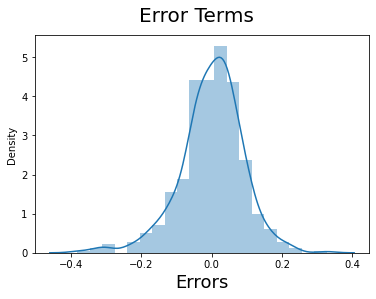

In [94]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

### Module Evaluation

Noe lets plot a scatter plot, test varibales vs predicted variables

Text(0, 0.5, 'y_pred')

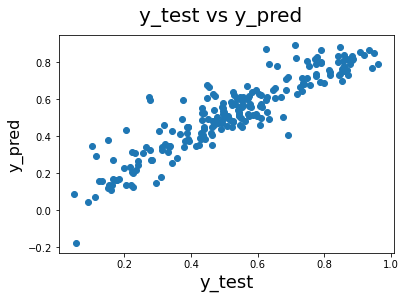

In [97]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

Lets check the pattern for actual vs predicted

Text(0, 0.5, 'Views')

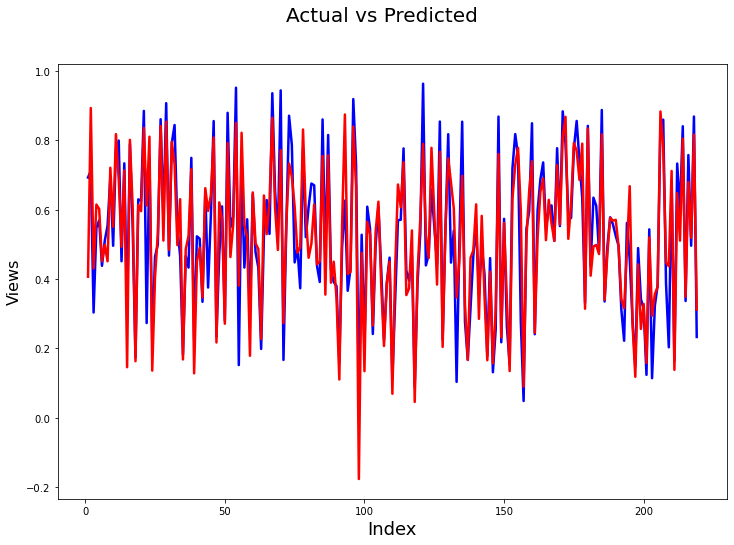

In [110]:
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=[12,8])
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)

Text(0, 0.5, 'Views_show-Predicted_views')

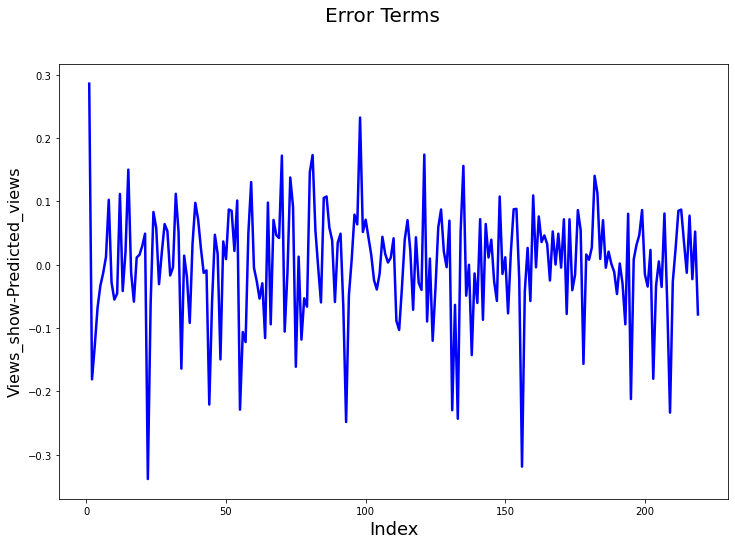

In [114]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=[12,8])
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Views_show-Predicted_views', fontsize=16) 

### R^2 Test

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8290593405063857

In [103]:
# Adjusted R-squared for trained dataset

yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8504617320630049 0.8414459113349948


In [105]:
#Adjusted r-squared for test datset

yhat = reg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.829059340506386 0.8028303504253552


The results from the R2 square is pretty much similar.

### Final Report

As per our  final model, the top3 predictor variables that influences the bike booking

- Temperature:  A coefficient value of ‘0.5982’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5982 units
- Weather Situation 3 (weathersit_partly_cloudly) - A coefficient value of ‘-0.2322’ indicated that, w.r.t Weather_partly_cloudy, a unit increase in Weather_partly_cloudy variable decreases the bike hire numbers by 0.2322 units.
-  Year (yr) - A coefficient value of ‘0.2284’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2284 units.

The next best features that can also be considered are:
- Season_winter : A coefficient value of ‘0.1358’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1358 units
- Windspeed:-A coefficient value of ‘-0.1976’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1976 units.